In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
print(torch.__version__)

1.12.1


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(0,50,50)
y = x + np.random.normal(0,1,50)

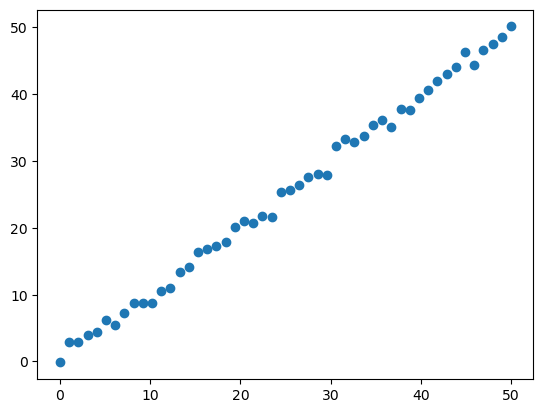

In [7]:
plt.scatter(x,y)

In [8]:
epochs = 10
learning_rate = 0.001

In [9]:
W = tf.Variable(0.)
b = tf.Variable(0.)

In [10]:
def linear_regression(x):
    y = W * x + b
    return y

In [11]:
def MSE(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [19]:
for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        y_pred = linear_regression(x)
        loss = MSE(y_pred, y)
        
    W_grad, b_grad = tape.gradient(loss, [W,b])
    
    W.assign_sub(W_grad * learning_rate)
    b.assign_sub(b_grad * learning_rate)
    
    print(f"[Epoch {epoch+1}] loss value: {loss.numpy()}")

[Epoch 1] loss value: 87.43060302734375
[Epoch 2] loss value: 41.432891845703125
[Epoch 3] loss value: 19.839574813842773
[Epoch 4] loss value: 9.702762603759766
[Epoch 5] loss value: 4.944112777709961
[Epoch 6] loss value: 2.7101876735687256
[Epoch 7] loss value: 1.6614854335784912
[Epoch 8] loss value: 1.1691738367080688
[Epoch 9] loss value: 0.9380520582199097
[Epoch 10] loss value: 0.8295464515686035


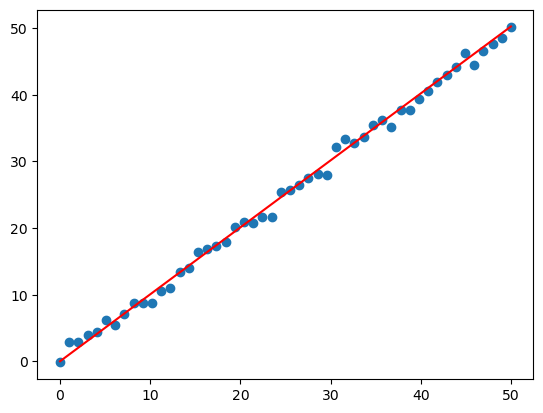

In [20]:
plt.scatter(x,y)
plt.plot(x, linear_regression(x), "r")
plt.show()

In [21]:
# keras 함수를 이용하기

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

In [3]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation="linear"))
model.compile(loss="mse", optimizer=sgd)

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 148ms/step - loss: 5.0580
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 4.0024
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 3.1680
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 2.5084
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 1.9870


In [7]:
print(model.predict(np.array([5])))

1/1 [==============================] - 0s 11ms/step
[[1.9093081]]


In [8]:
# perceptron: And 게이트

In [9]:
import numpy as np

In [10]:
def AND_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [11]:
def AND_np(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [25]:
AND_gate(0,1)

0

In [12]:
def NAND_gate(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [13]:
def NAND_np(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [22]:
NAND_np(1,0)

1

In [14]:
def OR_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [28]:
OR_gate(0,1)

1

In [19]:
def OR_np(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [30]:
# Step Function
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

C:\Users\leah5\AppData\Local\Temp\ipykernel_4080\4122757369.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


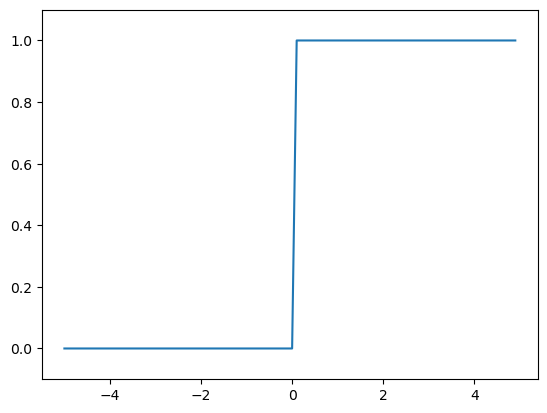

In [32]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [33]:
# Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [34]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

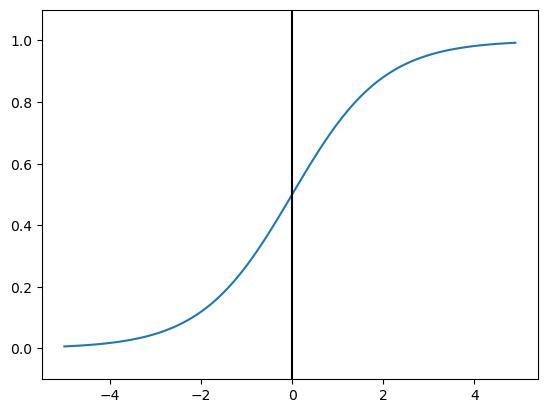

In [35]:
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.vlines(x=0, ymin=-0.1, ymax=1.1, color="black")
plt.show()

In [48]:
sigmoid(0)

0.5

In [36]:
# ReLu Function
def ReLU(x):
    return np.maximum(0, x)

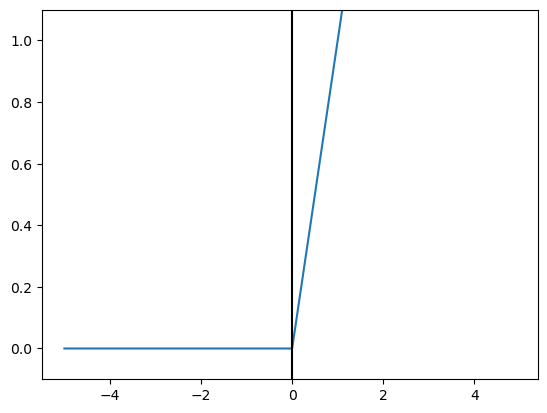

In [40]:
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.vlines(x=0,ymin=-0.1, ymax=1.1, color="black")
plt.show()

In [49]:
# 데이터 로드 및 train&test 분리

In [51]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_iris
from sklearn.base import BaseEstimator, ClassifierMixin

In [52]:
iris_data = load_iris()

In [55]:
iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))
iris_dataset = list(iris_dataset)

In [56]:
random.shuffle(iris_dataset)

In [57]:
def seperate_dataset():
    part_A_train = iris_dataset[0:40]
    part_A_test = iris_dataset[40:50]
    part_B_train = iris_dataset[50:90]
    part_B_test = iris_dataset[90:100]
    part_C_train = iris_dataset[100:140]
    part_C_test = iris_dataset[140:150]
    train = np.concatenate((part_A_train, part_B_train, part_C_train))
    test = np.concatenate((part_A_test, part_B_test, part_C_test))
    
    return train, test

In [58]:
train, test = seperate_dataset()

In [59]:
x_train = np.array([i[:4] for i in train])
y_train = np.array([i[4] for i in train])
x_test = np.array([i[:4] for i in test])
y_test = np.array([i[4] for i in test])

In [72]:
# 모델 만들기

In [105]:
class MLP(BaseEstimator, ClassifierMixin):

    def __init__(self):
        self.input_layer = 4
        self.hidden_layer = 5
        self.output_layer = 3
        self.learning_rate = 0.001
        self.max_epochs = 100
        self.bias_hidden_value = -1
        self.bias_output_value = -1

        self.w_hidden = [[2 * random.random() - 1 for i in range(self.hidden_layer)] for j in range(self.input_layer)]
        self.w_output = [[2 * random.random() - 1 for i in range(self.output_layer)] for j in range(self.hidden_layer)]

        self.bias_hidden = np.array([self.bias_hidden_value for i in range(self.hidden_layer)])
        self.bias_output = np.array([self.bias_output_value for i in range(self.output_layer)])

        self.n_class =3

    def activation_func(self,x):
        # sigmoid
        return 1 / (1 + np.exp(-x))
    
    def derivation_func(self,x):
        # sigmoid
        return x * (1 - x)
    
    def backpropagation(self,x):
        D_output=[]
        erro_output = self.output-self.output_l2
        D_output = -1 * erro_output * self.derivation_func(self.output_l2)

        for i in range(self.hidden_layer):
            for j in range(self.output_layer):
                self.w_output[i][j] -= self.learning_rate * (D_output[j] * self.output_l1[i])
                self.bias_output[j] -= self.learning_rate * D_output[j]

        D_hidden = np.matmul(self.w_output, D_output) * self.derivation_func(self.output_l1)

        for i in range(self.output_layer):
            for j in range(self.hidden_layer):
                self.w_hidden[i][j] -= self.learning_rate * (D_hidden[j] * x[i])
                self.bias_hidden[j] -= self.learning_rate * D_hidden[j]

    def predict(self, x, y):
        forecasts = []
        forward = self.activation_func(np.matmul(x, self.w_hidden) + self.bias_hidden)
        forward = np.matmul(forward, self.w_output) + self.bias_output

        for i in forward:
            forecasts.append(max(enumerate(i), key=lambda x : x[1])[0])
        
        array_score = []
        for i in range(len(forecasts)):
            if forecasts[i] == 0:
                array_score.append([i, "Iris-setosa", forecasts[i], y[i]])
            elif forecasts[i] == 1:
                array_score.append([i, "Iris-versicolour", forecasts[i], y[i]])
            elif forecasts[i] == 2:
                array_score.append([i, "Iris-virginica", forecasts[i], y[i]])
        dataframe = pd.DataFrame(array_score, columns=['id','class','model','target'])

        return forecasts, dataframe
    
    def fit(self,x,y):
        total_error = 0
        n = len(x)

        for epoch in range(self.max_epochs):
            for (idx, inputs) in enumerate(x):
                self.output = np.zeros(self.n_class)
                self.output_l1 = self.activation_func(np.dot(inputs, self.w_hidden)+self.bias_hidden.T)
                self.output_l2 = self.activation_func(np.dot(self.output_l1, self.w_output)+ self.bias_output.T)
                if y[idx] == 0:
                    self.output = np.array([1,0,0])
                elif y[idx] == 1:
                    self.output = np.array([0,1,0])
                elif y[idx] == 2:
                    self.output = np.array([0,0,1])

                square_error = 0
                for i in range(self.output_layer):
                    erro = (self.output[i] - self.output_l2[i]) ** 2
                    square_error = square_error + 0.05 * erro
                    total_error = total_error + square_error
                self.backpropagation(inputs)

            total_error = total_error / n
            print(f"[Epoch {epoch+1}] Total_error : {total_error}")

In [90]:
input_layer = 4
hidden_layer = 5
output_layer = 3
learning_rate = 0.001
max_epochs = 100
bias_hidden_value = -1
bias_output_value = -1

w_hidden = [[2 * random.random() - 1 for i in range(5)] for j in range(4)]
w_output = [[2 * random.random() - 1 for i in range(3)] for j in range(5)]

bias_hidden = np.array([-1 for i in range(5)])
bias_output = np.array([-1 for i in range(3)])
n_class =3

In [91]:
def activation_func(x): # sigmoid 함수
    # sigmoid
    return 1 / (1 + np.exp(-x))

In [92]:
def derivation_func(x): # 도함수
    # sigmoid
    return x * (1 - x)

In [93]:
def backpropagation(x): # 역전파 -> 가중치를 업데이트 하겠다는 뜻
    D_output=[]
    erro_output = output-output_l2
    D_output = -1 * erro_output * derivation_func(output_l2)

    for i in range(hidden_layer):
        for j in range(output_layer):
            w_output[i][j] -= learning_rate * (D_output[j] * output_l1[i])
            bias_output[j] -= learning_rate * D_output[j]

    D_hidden = np.matmul(w_output, D_output) * derivation_func(self.output_l1)

    for i in range(output_layer):
        for j in range(hidden_layer):
            w_hidden[i][j] -= learning_rate * (D_hidden[j] * x[i])
            bias_hidden[j] -= learning_rate * D_hidden[j]

In [94]:
def predict(x, y) # 모델 예측
    forecasts = []
    forward = activation_func(np.matmul(x, w_hidden) + bias_hidden)
    forward = np.matmul(forward, w_output) + bias_output

    for i in forward:
        forecasts.append(max(enumerate(i), key=lambda x : x[1])[0])

    array_score = []
    for i in range(len(forecasts)):
        if forecasts[i] == 0:
            array_score.append([i, "Iris-setosa", forecasts[i], y[i]])
        elif forecasts[i] == 1:
            array_score.append([i, "Iris-versicolour", forecasts[i], y[i]])
        elif forecasts[i] == 2:
            array_score.append([i, "Iris-virginica", forecasts[i], y[i]])
    dataframe = pd.DataFrame(array_score, columns=['id','class','model','target'])

    return forecasts, dataframe

In [95]:
def fit(x,y): # 모델 학습
    total_error = 0
    n = len(x)

    for epoch in range(max_epochs):
        for (idx, inputs) in enumerate(x):
            output = np.zeros(n_class)
            output_l1 = activation_func(np.dot(inputs, w_hidden)+bias_hidden.T) # 히든 레이어 가중치 보완 (편향값 b, 가중치값 w)
            output_l2 = activation_func(np.dot(output_l1, w_output)+ bias_output.T) # 결과 레이어 가중치 보완 (편향값 b, 가중치값 w)
            if y[idx] == 0:
                output = np.array([1,0,0])
            elif y[idx] == 1:
                output = np.array([0,1,0])
            elif y[idx] == 2:
                output = np.array([0,0,1])

            square_error = 0
            for i in range(output_layer):
                erro = (output[i] - output_l2[i]) ** 2
                square_error = square_error + 0.05 * erro
                total_error = total_error + square_error
            backpropagation(inputs)

        total_error = total_error / n
        print(f"[Epoch {epoch+1}] Total_error : {total_error}")

In [109]:
mlp = MLP()
mlp.fit(x_train, y_train)

forecast, df = mlp.predict(x_test, y_test)

[Epoch 1] Total_error : 0.07237037908608127
[Epoch 2] Total_error : 0.07267560242153744
[Epoch 3] Total_error : 0.07247305783395167
[Epoch 4] Total_error : 0.0722951172406074
[Epoch 5] Total_error : 0.07205120642844053
[Epoch 6] Total_error : 0.07181151547139995
[Epoch 7] Total_error : 0.07157736350952816
[Epoch 8] Total_error : 0.07134946618190816
[Epoch 9] Total_error : 0.07112848430040412
[Epoch 10] Total_error : 0.07091500938298845
[Epoch 11] Total_error : 0.07070954707594769
[Epoch 12] Total_error : 0.07051250434330111
[Epoch 13] Total_error : 0.0703241813181143
[Epoch 14] Total_error : 0.0701447682067496
[Epoch 15] Total_error : 0.06997434714319627
[Epoch 16] Total_error : 0.06981289844777012
[Epoch 17] Total_error : 0.06966031041468736
[Epoch 18] Total_error : 0.06951639156966803
[Epoch 19] Total_error : 0.06938088430355892
[Epoch 20] Total_error : 0.06925347887683471
[Epoch 21] Total_error : 0.06913382696347074
[Epoch 22] Total_error : 0.06902155411820211
[Epoch 23] Total_error